In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC, SVR
from sklearn.metrics import accuracy_score

In [2]:
# Load data
x_train = np.load("x_train.npy")
y_train = np.load("y_train.npy")
x_test = np.load("x_test.npy")
y_test = np.load("y_test.npy")

In [3]:
# 7000 data with 300 features
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)

(7000, 300)
(7000,)
(3000, 300)


In [4]:
# It's a binary classification problem 
print(np.unique(y_train))

[0 1]


Q1

In [5]:
def cross_validation(x_train, y_train, k=5):
    
    # Do not modify the function name and always take 'x_train, y_train, k' as the inputs.

    # TODO HERE
    #Store each fold 
    kfold_data = [] 
    #Shuffle each data point
    shuffle_index = np.array(range(0, len(x_train)))
    np.random.seed(0)
    np.random.shuffle(shuffle_index)
    #Divide the number of samples for each fold
    fold_sizes = (len(x_train)//k) * np.ones(k, dtype=np.int_)
    fold_sizes[:len(x_train) % k] += 1
    #Start to divide the dataset into K subsets
    current = 0
    for fold_size in fold_sizes:
        start, stop = current, current + fold_size
        val_indices = shuffle_index[start:stop]
        train_indices = np.concatenate((shuffle_index[:start], shuffle_index[stop:]))
        kfold_data.append([train_indices, val_indices])   
        current = stop
    return kfold_data

In [6]:
X = np.arange(20)

kf= cross_validation(X, y_train=None , k=2)
print("--------------------k=2--------------------")
for i, (train_index, val_index) in enumerate(kf):
    print("Split:%s, Training index: %s, Validation index: %s, Validation size: %s" % (i+1, train_index, val_index,len(val_index)))
kf= cross_validation(X, y_train=None , k=3)
print("--------------------k=3--------------------")
for i, (train_index, val_index) in enumerate(kf):
    print("Split:%s, Training index: %s, Validation index: %s, Validation size: %s" % (i+1, train_index, val_index,len(val_index)))
kf= cross_validation(X, y_train=None , k=4)
print("--------------------k=4--------------------")
for i, (train_index, val_index) in enumerate(kf):
    print("Split:%s, Training index: %s, Validation index: %s, Validation size: %s" % (i+1, train_index, val_index,len(val_index)))
kf= cross_validation(X, y_train=None , k=5)
print("--------------------k=5--------------------")
for i, (train_index, val_index) in enumerate(kf):
    print("Split:%s, Training index: %s, Validation index: %s, Validation size: %s" % (i+1, train_index, val_index,len(val_index)))


--------------------k=2--------------------
Split:1, Training index: [ 5 14  9  7 16 11  3  0 15 12], Validation index: [18  1 19  8 10 17  6 13  4  2], Validation size: 10
Split:2, Training index: [18  1 19  8 10 17  6 13  4  2], Validation index: [ 5 14  9  7 16 11  3  0 15 12], Validation size: 10
--------------------k=3--------------------
Split:1, Training index: [13  4  2  5 14  9  7 16 11  3  0 15 12], Validation index: [18  1 19  8 10 17  6], Validation size: 7
Split:2, Training index: [18  1 19  8 10 17  6 16 11  3  0 15 12], Validation index: [13  4  2  5 14  9  7], Validation size: 7
Split:3, Training index: [18  1 19  8 10 17  6 13  4  2  5 14  9  7], Validation index: [16 11  3  0 15 12], Validation size: 6
--------------------k=4--------------------
Split:1, Training index: [17  6 13  4  2  5 14  9  7 16 11  3  0 15 12], Validation index: [18  1 19  8 10], Validation size: 5
Split:2, Training index: [18  1 19  8 10  5 14  9  7 16 11  3  0 15 12], Validation index: [17  6 

In [7]:
kfold_data = cross_validation(x_train, y_train, k=10)
assert len(kfold_data) == 10 # should contain 10 fold of data
assert len(kfold_data[0]) == 2 # each element should contain train fold and validation fold
assert kfold_data[0][1].shape[0] == 700 # The number of data in each validation fold should equal to training data divieded by K

K-Fold Example

In [8]:
from sklearn.model_selection import KFold

X = np.arange(20)

kf = KFold(n_splits=5, shuffle=True)
kfold_data= []
for i, (train_index, val_index) in enumerate(kf.split(X)):
    print("Split: %s, Training index: %s, Validation index: %s" % (i+1, train_index, val_index))
    kfold_data.append([train_index, val_index])

Split: 1, Training index: [ 0  1  2  3  4  5  6  7  9 12 13 14 15 16 17 19], Validation index: [ 8 10 11 18]
Split: 2, Training index: [ 0  1  2  3  4  5  6  7  8 10 11 14 15 16 17 18], Validation index: [ 9 12 13 19]
Split: 3, Training index: [ 2  4  5  6  7  8  9 10 11 12 13 14 16 17 18 19], Validation index: [ 0  1  3 15]
Split: 4, Training index: [ 0  1  3  7  8  9 10 11 12 13 14 15 16 17 18 19], Validation index: [2 4 5 6]
Split: 5, Training index: [ 0  1  2  3  4  5  6  8  9 10 11 12 13 15 18 19], Validation index: [ 7 14 16 17]


In [9]:
assert len(kfold_data) == 5 # should contain 5 fold of data
assert len(kfold_data[0]) == 2 # each element should contains index of training fold and validation fold
assert kfold_data[0][1].shape[0] == 4 # The number of data in each validation fold should equal to training data divieded by K

Q2

In [10]:
# (Example) Using SVC from sklearn

clf = SVC(C=1.0, gamma=0.01, kernel='rbf')

In [11]:
best_c, best_gamma = None, None

# TODO HERE
# k-Flod Cross Validation and Grid Search
K_fold = cross_validation(x_train, y_train, k=5)
maximum_score = -1
result = []

for C in [0.01, 0.1, 1, 10, 100, 1000, 10000]:
    round_acc = []
    for g in [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]:
        average_score = []
        for _ , fold_data in enumerate(K_fold):
            clf = SVC(C=C, kernel='rbf', gamma=g)
            clf.fit(x_train[fold_data[0]], y_train[fold_data[0]])
            y_pred = clf.predict(x_train[fold_data[1]])
            score = accuracy_score(y_pred, y_train[fold_data[1]])
            average_score.append(score)
        score = np.mean(average_score)
        round_acc.append(round(score, 2))
        if score > maximum_score:
            maximum_score = score
            best_c, best_gamma = C, g
    result.append(round_acc)

best_parameters=(best_c, best_gamma)

In [12]:
print("(best_c, best_gamma) is ", best_parameters)

(best_c, best_gamma) is  (1, 0.0001)


Q3

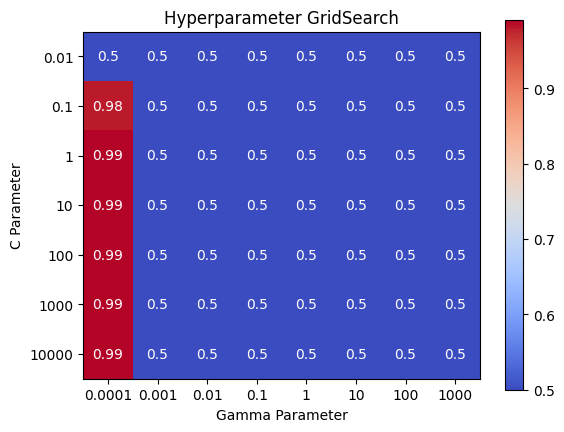

In [13]:
# Plot the grid search results of your SVM

# TODO HERE
xlabel = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
ylabel = [0.01, 0.1, 1, 10, 100, 1000, 10000]
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_yticks(range(len(ylabel)))
ax.set_yticklabels(ylabel)
ax.set_xticks(range(len(xlabel)))
ax.set_xticklabels(xlabel)
ax.grid(which="minor", color="w", linestyle='-', linewidth=3)
data = np.array(result)
for x in range(data.shape[0]):
    for y in range(data.shape[1]):
        text = ax.text(y, x, data[x, y],ha="center", va="center", color="w")
img = ax.imshow(data, cmap=plt.cm.coolwarm)
plt.colorbar(img)
plt.title("Hyperparameter GridSearch")
plt.xlabel("Gamma Parameter")
plt.ylabel("C Parameter")
plt.show()


Q4

In [14]:
# Do Not Modify Below

best_model = SVC(C=best_parameters[0], gamma=best_parameters[1], kernel='rbf')
best_model.fit(x_train, y_train)

y_pred = best_model.predict(x_test)

print("Accuracy score: ", accuracy_score(y_pred, y_test))

# If your accuracy here > 0.9 then you will get full credit (20 points).

Accuracy score:  0.995
